In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
df.shape

(500, 9)

In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace = True)
df.drop(columns='Serial No.', inplace=True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


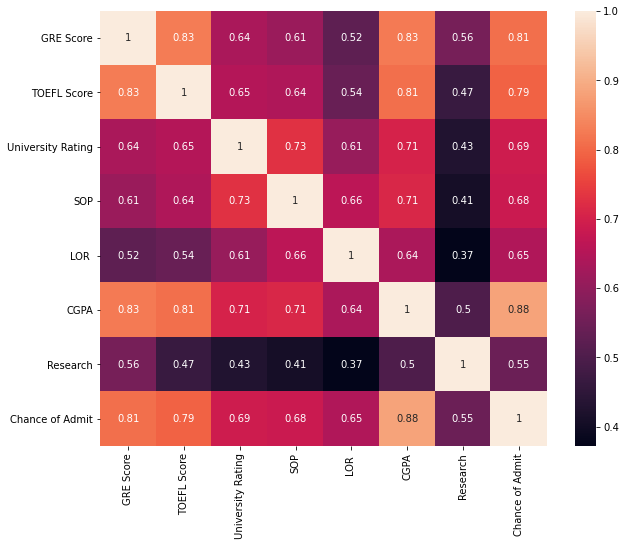

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)

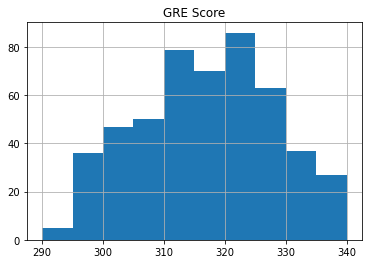

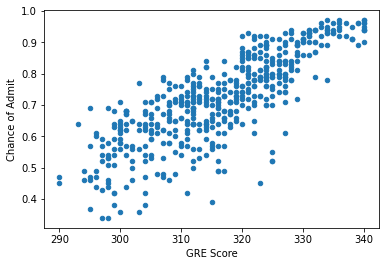

In [9]:
df[['GRE Score']].hist()
df.plot(x = 'GRE Score', y = 'Chance of Admit', kind = 'scatter')

In [10]:
x=df.drop(columns = 'Chance of Admit')
y=df[['Chance of Admit']]
x_train = x[:400]
x_test = x[400:]
y_train = y[:400]
y_test = y[400:]

In [11]:
x_train.shape

(400, 7)

In [12]:
x_test.shape

(100, 7)

In [13]:
y_train.shape

(400, 1)

In [14]:
y_test.shape

(100, 1)

In [15]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [16]:
reg.score(x_train, y_train)

0.8034713719824393

In [17]:
reg.score(x_test, y_test)

0.898286909853386

In [18]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, reg.predict(x_test), squared=False)

In [19]:
rmse

0.04293220746251859

In [20]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [21]:
import pickle
pickle.dump(reg, open("model", 'wb'))

In [22]:
temp = x[:1]

In [23]:
temp = np.array([337, 118, 4, 4.5, 4.5, 9.65, 1])
temp = temp.reshape(1, -1)

In [24]:
reg.predict(temp)

array([[0.95188302]])